#### This notebook is used to analyze the generated FGT and Breast mask 100899

In [2]:
#first let us import the necessary modules

import matplotlib.pyplot as plt
from preprocessing import *
from ispy_utils import *
import numpy as np

In [3]:
#setting file paths

#precontrast image path
file_pre ='data/manifest-1731289169928/ISPY2/ISPY2-103693/04-01-2004-103693T0-ISPY2MRIT0-60619/500.000000-ISPY2 AX VIBRANT-SERIES-14413'

#postcontrast image path
file_post = 'data/manifest-1731289169928/ISPY2/ISPY2-103693/04-01-2004-103693T0-ISPY2MRIT0-60619/501.000000-ISPY2 Ph1AX VIBRANT-SERIES-20179'

(512, 512, 96)


(-0.5, 511.5, 511.5, -0.5)

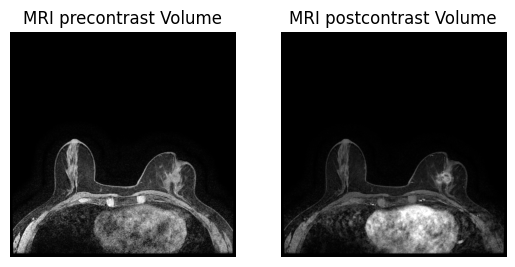

In [4]:
#apply function from ispymri.py 
image_array_pre, dcm_data_pre = read_ispy_mri(file_pre)
image_array_pre = zscore_image(normalize_image(image_array_pre))
# saving image - will be used as an input to prediction code
np.save('./input_pre_103693/output.npy', image_array_pre)
print(image_array_pre.shape)  #optional

image_array_post, dcm_data_post = read_ispy_mri(file_post)
image_array_post = zscore_image(normalize_image(image_array_post))
np.save('./input_post_103693/output.npy', image_array_post)


#plotting both the images

plt.subplot(1,2,1)
plt.title('MRI precontrast Volume')
plt.imshow(image_array_pre[:,:,60], cmap = 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('MRI postcontrast Volume')
plt.imshow(image_array_post[:,:,60], cmap='gray')
plt.axis('off')

(512, 512, 96)


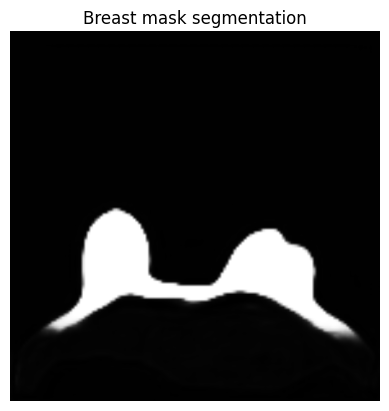

In [5]:
breast_mask_seg = np.load('./mask_103693/output.npy')
print(breast_mask_seg.shape)

#plotting the mask
plt.imshow(breast_mask_seg[:, :, 60], cmap = 'gray')
plt.title('Breast mask segmentation')
plt.axis('off')
plt.show()

Shape of original Breast Mask Segmentation data: (512, 512, 96)


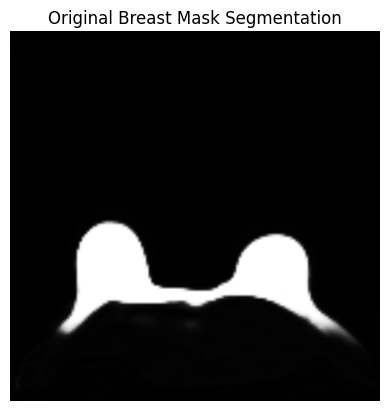

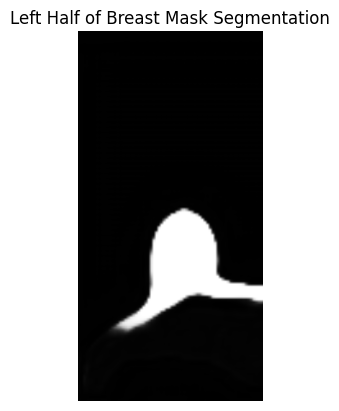

Left half:
 [[[0.02444  0.01627  0.01488  ... 0.01501  0.01651  0.02371 ]
  [0.02444  0.01627  0.01488  ... 0.01501  0.01651  0.02371 ]
  [0.02298  0.01554  0.0143   ... 0.01446  0.01591  0.02232 ]
  ...
  [0.01504  0.01137  0.01123  ... 0.011024 0.01158  0.01418 ]
  [0.01504  0.01136  0.01123  ... 0.01104  0.011604 0.01419 ]
  [0.01507  0.0114   0.011246 ... 0.01101  0.01155  0.01418 ]]

 [[0.02444  0.01627  0.01488  ... 0.01501  0.01651  0.02371 ]
  [0.02444  0.01627  0.01488  ... 0.01501  0.01651  0.02371 ]
  [0.02298  0.01554  0.0143   ... 0.01446  0.01591  0.02232 ]
  ...
  [0.01504  0.01137  0.01123  ... 0.011024 0.01158  0.01418 ]
  [0.01504  0.01136  0.01123  ... 0.01104  0.011604 0.01419 ]
  [0.01507  0.0114   0.011246 ... 0.01101  0.01155  0.01418 ]]

 [[0.02316  0.01566  0.014275 ... 0.01442  0.0159   0.02246 ]
  [0.02316  0.01566  0.014275 ... 0.01442  0.0159   0.02246 ]
  [0.0218   0.01508  0.01383  ... 0.01402  0.015465 0.0212  ]
  ...
  [0.01429  0.011444 0.011314 ... 0.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

breast_mask_seg = np.load('./mask_103693/output.npy')
print("Shape of original Breast Mask Segmentation data:", breast_mask_seg.shape)

plt.imshow(breast_mask_seg[:,:,42], cmap='gray')
plt.title('Original Breast Mask Segmentation')
plt.axis('off')
plt.show()

mid_index = breast_mask_seg.shape[1] // 2

left_half = breast_mask_seg[:, :mid_index, :]

plt.imshow(left_half[:,:,60], cmap = 'gray')
plt.title('Left Half of Breast Mask Segmentation')
plt.axis('off')
plt.show()

print("Left half:\n", left_half)

np.save('./mask_103693/mask_left.npy', left_half)


(3, 512, 512, 96)


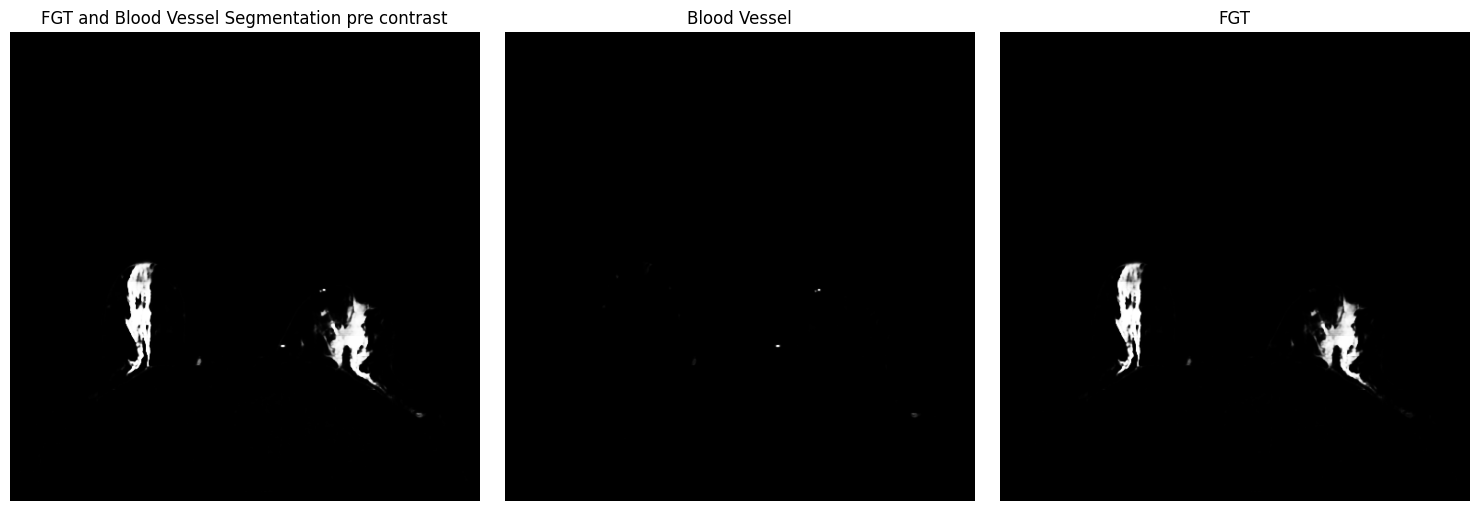

In [7]:
#shape of fgt
import numpy as np
import matplotlib.pyplot as plt

fgt_data_pre = np.load('./fgt_pre_103693/output.npy')
print(fgt_data_pre.shape)

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#plotting the data
axes[0].imshow(fgt_data_pre[0, :, :, 60], cmap = 'Greys')
axes[0].set_title('FGT and Blood Vessel Segmentation pre contrast')
axes[0].axis('off')
#plt.show()

axes[1].imshow(fgt_data_pre[1, :, :, 60], cmap = 'gray')
axes[1].set_title('Blood Vessel')
axes[1].axis('off')
#plt.show()

axes[2].imshow(fgt_data_pre[2, :, :, 60], cmap = 'gray')
axes[2].set_title('FGT')
axes[2].axis('off')
#plt.show()
# Show the figure
plt.tight_layout()
plt.show()

(3, 512, 512, 96)


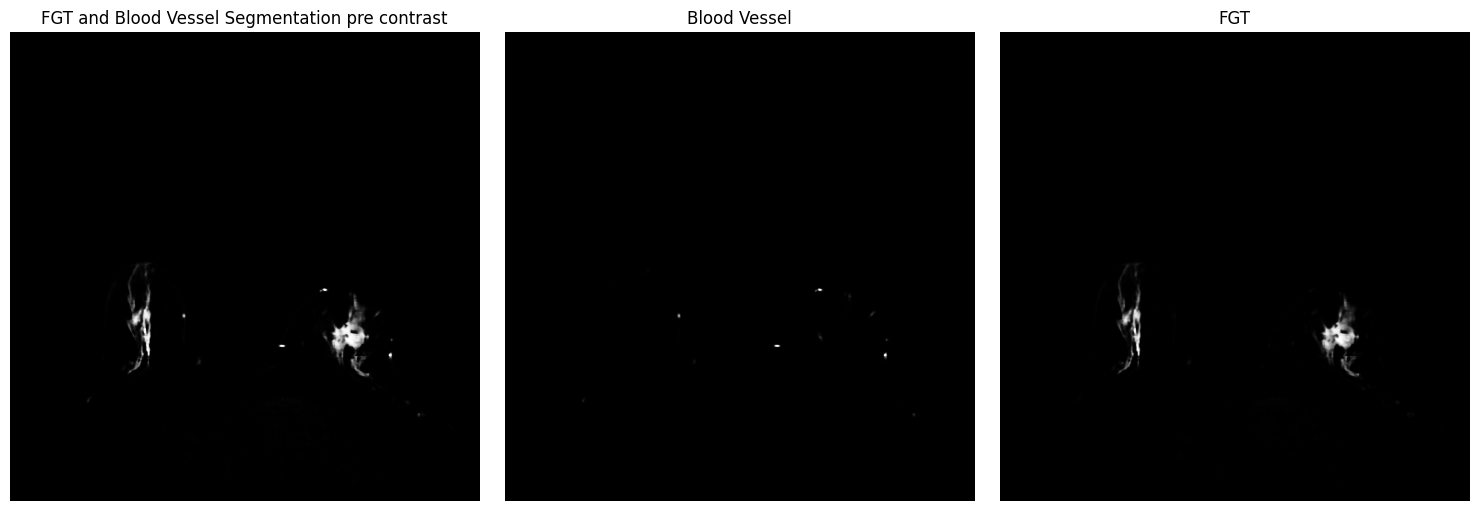

In [10]:
#shape of fgt
import numpy as np
import matplotlib.pyplot as plt

fgt_data_pre = np.load('./fgt_post_103693/output.npy')
print(fgt_data_pre.shape)

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#plotting the data
axes[0].imshow(fgt_data_pre[0, :, :, 60], cmap = 'Greys')
axes[0].set_title('FGT and Blood Vessel Segmentation pre contrast')
axes[0].axis('off')
#plt.show()

axes[1].imshow(fgt_data_pre[1, :, :, 60], cmap = 'gray')
axes[1].set_title('Blood Vessel')
axes[1].axis('off')
#plt.show()

axes[2].imshow(fgt_data_pre[2, :, :, 60], cmap = 'gray')
axes[2].set_title('FGT')
axes[2].axis('off')
#plt.show()
# Show the figure
plt.tight_layout()
plt.show()

Splitting of the breast

Shape of FGT data: (3, 512, 512, 96)
Shape of slice 42: (512, 512, 96)


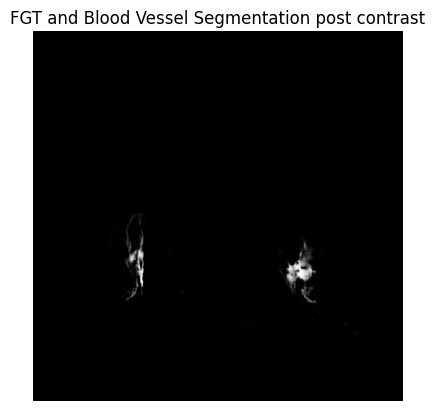

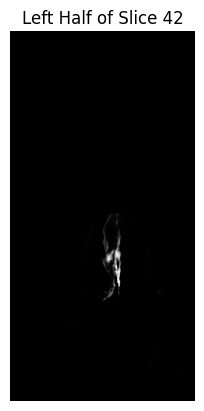

Left half:
 [[[2.9993e-04 2.9397e-04 4.1175e-04 ... 4.8971e-04 4.6468e-04 5.3120e-04]
  [2.0349e-04 1.6272e-04 2.9731e-04 ... 2.6917e-04 2.8419e-04 3.7837e-04]
  [2.6846e-04 2.4092e-04 4.3035e-04 ... 4.5419e-04 4.1890e-04 5.1260e-04]
  ...
  [5.5313e-04 4.2081e-04 4.9067e-04 ... 1.4219e-03 1.4114e-03 1.3552e-03]
  [5.4407e-04 4.0698e-04 4.6706e-04 ... 1.4009e-03 1.3962e-03 1.3475e-03]
  [5.3072e-04 3.8791e-04 4.4656e-04 ... 1.3781e-03 1.3647e-03 1.3361e-03]]

 [[2.2089e-04 1.2577e-04 2.7585e-04 ... 3.4428e-04 3.0804e-04 3.4451e-04]
  [1.3328e-04 5.2631e-05 1.8311e-04 ... 1.2457e-04 1.2553e-04 1.5461e-04]
  [1.8501e-04 9.8169e-05 2.9230e-04 ... 2.6512e-04 2.2590e-04 2.9802e-04]
  ...
  [6.6566e-04 4.2439e-04 8.0109e-04 ... 4.0913e-04 4.1890e-04 7.2622e-04]
  [6.4802e-04 4.0054e-04 7.6532e-04 ... 4.0245e-04 4.1509e-04 7.2479e-04]
  [6.2847e-04 3.7861e-04 7.3862e-04 ... 3.9697e-04 4.0555e-04 7.1716e-04]]

 [[1.5140e-04 8.3029e-05 2.2471e-04 ... 2.0826e-04 1.9014e-04 2.5749e-04]
  [9.7454e

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fgt_data_post = np.load('./fgt_post_103693/output.npy')
print("Shape of FGT data:", fgt_data_post.shape)

slice_fgt = fgt_data_post[2, :, :, :]
print("Shape of slice 42:", slice_fgt.shape)

plt.imshow(slice_fgt[:,:,60], cmap='gray')
plt.title('FGT and Blood Vessel Segmentation post contrast')
plt.axis('off')
plt.show()

mid_index = slice_fgt.shape[1] // 2

left_half = slice_fgt[:, :mid_index, :]

plt.imshow(left_half[:,:,60], cmap='gray')
plt.title('Left Half of Slice 42')
plt.axis('off')
plt.show()

print("Left half:\n", left_half)

np.save('./half_breast_103693/left_half_post_103693.npy', left_half)



#calc breast volume and fgt volume for this

Shape of FGT data: (3, 512, 512, 96)
Shape of slice 42: (512, 512, 96)


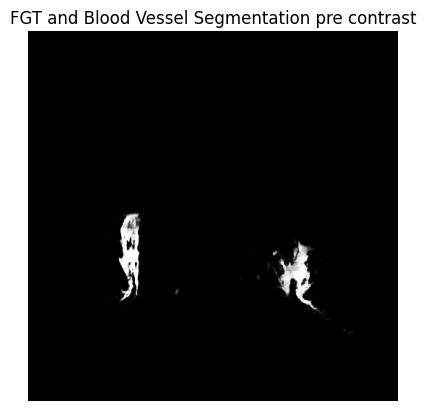

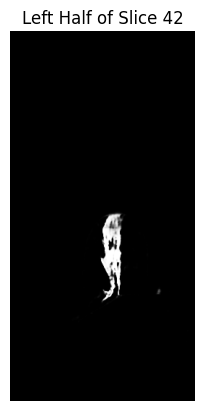

Left half:
 [[[3.1972e-04 3.2878e-04 4.8637e-04 ... 5.6791e-04 5.2261e-04 5.5838e-04]
  [2.4676e-04 2.4414e-04 4.3869e-04 ... 4.5896e-04 4.0889e-04 4.4942e-04]
  [3.7503e-04 4.2033e-04 5.9032e-04 ... 6.7091e-04 6.8140e-04 6.6805e-04]
  ...
  [8.1396e-04 6.2943e-04 7.0000e-04 ... 1.4458e-03 1.4830e-03 1.4181e-03]
  [8.0681e-04 6.0225e-04 6.6614e-04 ... 1.4305e-03 1.4839e-03 1.4143e-03]
  [7.8773e-04 5.6982e-04 6.3658e-04 ... 1.4200e-03 1.4610e-03 1.4114e-03]]

 [[2.5821e-04 1.6916e-04 4.2367e-04 ... 5.0259e-04 4.0317e-04 3.9768e-04]
  [1.9538e-04 1.0705e-04 3.3355e-04 ... 3.0708e-04 2.5535e-04 2.1601e-04]
  [3.1137e-04 2.6488e-04 5.0068e-04 ... 4.4751e-04 5.0640e-04 4.1461e-04]
  ...
  [9.9373e-04 7.6675e-04 8.6594e-04 ... 4.4370e-04 4.6468e-04 8.1778e-04]
  [9.7275e-04 7.2861e-04 8.3303e-04 ... 4.3988e-04 4.6515e-04 8.2064e-04]
  [9.4986e-04 6.8808e-04 8.0633e-04 ... 4.3845e-04 4.6563e-04 8.1444e-04]]

 [[1.8883e-04 1.2577e-04 3.6120e-04 ... 3.3259e-04 2.8896e-04 3.1829e-04]
  [1.6224e

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fgt_data_pre = np.load('./fgt_pre_103693/output.npy')
print("Shape of FGT data:", fgt_data_pre.shape)

slice_fgt = fgt_data_pre[2, :, :, :]
print("Shape of slice 42:", slice_fgt.shape)

plt.imshow(slice_fgt[:,:,60], cmap='gray')
plt.title('FGT and Blood Vessel Segmentation pre contrast')
plt.axis('off')
plt.show()

mid_index = slice_fgt.shape[1] // 2

left_half = slice_fgt[:, :mid_index, :]

plt.imshow(left_half[:,:,60], cmap='gray')
plt.title('Left Half of Slice 42')
plt.axis('off')
plt.show()

print("Left half:\n", left_half)

np.save('./half_breast_103693/left_half_pre_103693.npy', left_half)


(-0.5, 255.5, 511.5, -0.5)

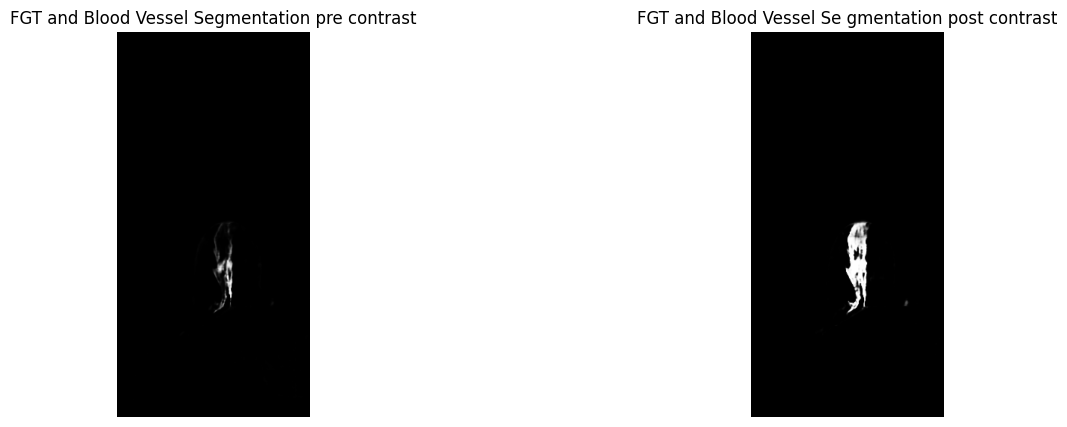

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fgt_half_pre = np.load('./half_breast_103693/left_half_post_103693.npy')
fgt_half_post = np.load('./half_breast_103693/left_half_pre_103693.npy')

#plotting the data
axes[0].imshow(fgt_half_pre[:, :, 60], cmap = 'gray')
axes[0].set_title('FGT and Blood Vessel Segmentation pre contrast')
axes[0].axis('off')

axes[1].imshow(fgt_half_post[:, :, 60], cmap = 'gray')
axes[1].set_title('FGT and Blood Vessel Se gmentation post contrast')
axes[1].axis('off')


In [15]:
import pydicom 


dicom_file = pydicom.dcmread('data/manifest-1731289169928/ISPY2/ISPY2-103693/04-01-2004-103693T0-ISPY2MRIT0-60619/500.000000-ISPY2 AX VIBRANT-SERIES-14413/1-60.dcm')

pixel_spacing = dicom_file.PixelSpacing 
slice_thickness = dicom_file.SliceThickness
slice_gap = dicom_file.get('SpacingBetweenSlices', 0)  
print(f"Pixel Spacing (mm): {pixel_spacing}")
print(f"Slice Thickness (mm): {slice_thickness}")
print(f"Slice Gap (mm): {slice_gap}")


Pixel Spacing (mm): [0.5664, 0.5664]
Slice Thickness (mm): 2
Slice Gap (mm): 2


## Calculation of breast Volume

for half breast

In [16]:
import numpy as np

#loading images
mask = np.load('./mask_103693/output.npy')
mask_left = np.load('./mask_103693/mask_left.npy')

#voxel dimensions
voxel_dimensions = (0.5664, 0.5664, 2.0)  
voxel_volume_mm3 = np.prod(voxel_dimensions)  

#total voxel count
n_breast_voxel = np.sum(mask_left > 0.5)
print(f'{n_breast_voxel} total voxels')

#volume calculation
print(f"{n_breast_voxel * voxel_volume_mm3} cubic mm")
breast_cc_half=(n_breast_voxel * voxel_volume_mm3)/1000
print(f"{breast_cc_half:.2f} cubic cm")

935789 total voxels
600418.99173888 cubic mm
600.42 cubic cm


for full breast

In [17]:
import numpy as np

#loading images
mask = np.load('./mask_103693/output.npy')

#voxel dimensions
voxel_dimensions = (0.5664, 0.5664, 2.0)  
voxel_volume_mm3 = np.prod(voxel_dimensions)  

#total voxel count
n_breast_voxel = np.sum(mask > 0.5)
print(f'{n_breast_voxel} total voxels')

#volume calculation
print(f"{n_breast_voxel * voxel_volume_mm3} cubic mm")
breast_cc=(n_breast_voxel * voxel_volume_mm3)/1000
print(f"{breast_cc:.2f} cubic cm")

1815555 total voxels
1164892.6227456 cubic mm
1164.89 cubic cm


In [19]:
#saving pre and post contrast into 3D
fgt_seg_42 = np.load('fgt_pre_103693/output.npy')
fgt_seg_42_post = np.load('fgt_post_103693/output.npy')

slice_42_pre_3d = fgt_seg_42[2,:,:,:]
np.save('fgt_pre_103693/42_3d_pre.npy', slice_42_pre_3d)

print(slice_42_pre_3d.shape)

slice_42_post_3d = fgt_seg_42_post[2,:,:,:]
np.save('fgt_post_103693/42_3d_post.npy', slice_42_post_3d)

(512, 512, 96)


Bpe volume

In [20]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

pre_contrast = np.load('fgt_pre_103693/42_3d_pre.npy')
post_contrast = np.load('fgt_post_103693/42_3d_post.npy')

voxel_dimensions = (0.5664, 0.5664, 2.0) 
voxel_volume = np.prod(voxel_dimensions)  

percent_enhancement = (post_contrast - pre_contrast) / pre_contrast * 100
percent_enhancement = percent_enhancement * (pre_contrast != 0)
percent_enhancement = percent_enhancement * (mask>0.5)


n_fgt_voxel = np.sum(percent_enhancement > 0)  #change based on desired threshold
print(f'{n_fgt_voxel} total voxels')

print(f'{n_fgt_voxel * voxel_volume} cubic mm')
fgt_ccs = (n_fgt_voxel * voxel_volume)/1000
print(f'{fgt_ccs} cubic cm')

999789 total voxels
641482.5386188801 cubic mm
641.4825386188801 cubic cm


In [53]:
import warnings
warnings.filterwarnings('ignore')

#loading data
mask_left = np.load('./mask_103693/mask_left.npy')
fgt_half_pre = np.load('./half_breast_103693/left_half_post_103693.npy')
fgt_half_post = np.load('./half_breast_103693/left_half_pre_103693.npy')

#voxel dimensions
voxel_dimensions = (0.5664, 0.5664, 2.0)  
voxel_volume = np.prod(voxel_dimensions)  

#mask application and preparation
percent_enhancement = (fgt_half_post - fgt_half_pre) / fgt_half_pre * 100  
percent_enhancement = percent_enhancement * (fgt_half_pre != 0)
percent_enhancement = percent_enhancement * (mask_left>0.5)

n_fgt_voxel = np.sum(percent_enhancement > 100)  #change based on desired threshold
print(f'{n_fgt_voxel} total voxels')

print(f'{n_fgt_voxel * voxel_volume} cubic mm')
fgt_ccs_half = (n_fgt_voxel * voxel_volume)/1000
print(f'{fgt_ccs_half} cubic cm')


206110 total voxels
132243.86949120002 cubic mm
132.24386949120003 cubic cm


In [54]:
#calculating bpe percentage 

total_breast_volume = breast_cc
half_breast_volume = breast_cc_half

bpe_volume_Cm3 = fgt_ccs
bpe_volume_half = fgt_ccs_half

bpe_percentage = (bpe_volume_Cm3 / total_breast_volume) * 100
bpe_percentage_halved = (bpe_volume_half / half_breast_volume) * 100

print(f"BPE Percentage of full breast: {bpe_percentage:.2f}%")
print(f"BPE Percentage of left half of breast: {bpe_percentage_halved:.2f}%")


BPE Percentage of full breast: 55.07%
BPE Percentage of left half of breast: 22.03%
